**Аналитика в Яндекс-Афише**

__Описание проекта__

Исходные данные: данные интернет-сервиса по продаже билетов Яндекс.Афиша с июня 2017 по конец мая 2018 года.

Цель - изучить поведение пользователей и рассчитать бизнес-метрики, чтобы выработать на их основе рекомендации по оптимизации маркетинговых затрат: куда и сколько вкладывать денег, в какие источники/платформы.

**Оглавление**

Шаг 1. Загрузка данных и подготовка их к анализу

Шаг 2. Построение отчётов и расчет метрик

2.1. Продукт

2.2. Покупки

2.3. Маркетинг

Шаг 3. Общий вывод

**Общие функции для работы с данными**

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Функция для вывода графиков:
def print_plot(data, kind, plot_title, x_name, y_name, linewidth=3):
    data.plot(kind=kind, grid=True, figsize=(12, 5))
    plt.title(plot_title)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()
    
# Функция для вывода тепловой карты:
def print_heatmap(data, plot_title, fmt, vmax, x_name, y_name):
    yticks = data.index
    sns.set(style='white')
    plt.figure(figsize=(12,7))
    plt.title(plot_title)
    sns.heatmap(data, annot=True, fmt=fmt, vmax=vmax, linewidth=0.01, yticklabel=yticks, linecor='gray')
    plt.yticks(rotation=0)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

# # Для увеличения четкости изображения
# %config InlineBackend.figure_format = 'retina'

# # Для отключения предупреждений SettingWithCopyWarning
# pd.options.mode.chained_assigment = None

**Шаг 1. Загрузка данных и подготовка их к анализу**


In [322]:
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

__Данные о посещениях (visits)__

In [323]:
visits.info()
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [324]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [325]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [326]:
visits['visit_duration'] = ((visits['end_ts'] - visits['start_ts']).dt.seconds / 60).astype('int')

In [327]:
visits[visits['visit_duration'] == 0]

,device,end_ts,source_id,start_ts,uid,visit_duration
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0
28,desktop,2017-11-09 15:53:00,4,2017-11-09 15:53:00,17892541477379911957,0
32,desktop,2017-11-30 12:29:00,4,2017-11-30 12:29:00,13410401624913285510,0
54,desktop,2018-02-23 16:52:00,10,2018-02-23 16:52:00,13423278602430425332,0
...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,0


Учтем в анализе визиты, которые длятся меньше 1 минуты и не будем удалять их из датасета

**Данные о заказах (orders)**

In [328]:
orders.info()
orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [329]:
orders.columns = ['buy_ts', 'revenue', 'uid']

In [330]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [331]:
orders[orders['revenue'] == 0].count()

buy_ts     51
revenue    51
uid        51
dtype: int64

In [332]:
orders = orders[orders['revenue'] > 0]

In [374]:
costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Данные о затратах на маркетинг (costs)**

In [333]:
costs.info()
costs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [334]:
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [335]:
costs[costs['costs'] == 0]

,source_id,dt,costs


**Шаг 2. Построение отчётов и расчет метрик**

2.1. Продукт

Рассчитаем DAU, WAU, MAU

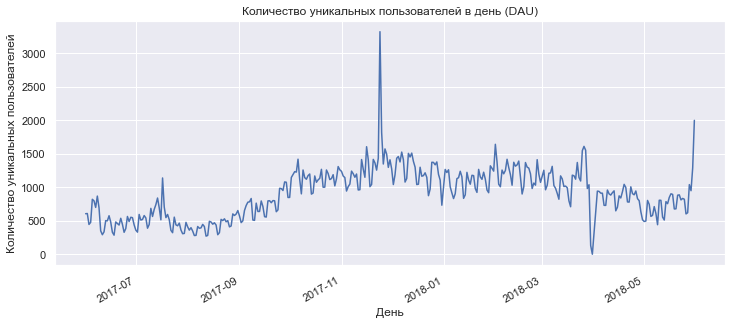

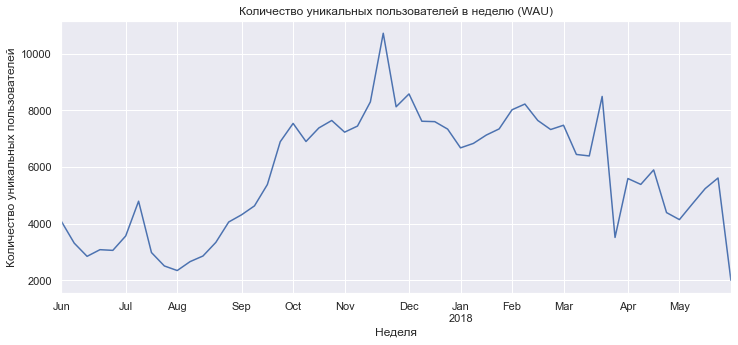

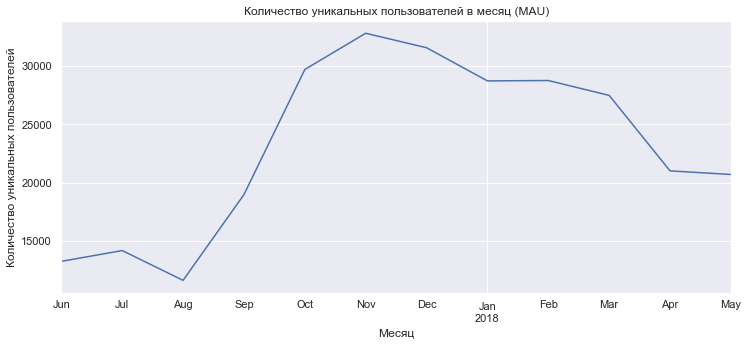

In [336]:
visits['day'] = visits['start_ts'].astype('datetime64[D]')
visits['week'] = visits['start_ts'].astype('datetime64[W]')
visits['month'] = visits['start_ts'].astype('datetime64[M]')

# Построим для них графики
print_plot(visits.groupby('day')['uid'].nunique(),
           'line', 'Количество уникальных пользователей в день (DAU)', 'День',
           'Количество уникальных пользователей')

print_plot(visits.groupby('week')['uid'].nunique(),
           'line', 'Количество уникальных пользователей в неделю (WAU)', 'Неделя',
           'Количество уникальных пользователей')

print_plot(visits.groupby('month')['uid'].nunique(),
           'line', 'Количество уникальных пользователей в месяц (MAU)', 'Месяц',
           'Количество уникальных пользователей')

In [337]:
visits.groupby('day')['uid'].nunique()

day
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64

Из графика можно сделать выводы:
MAU: Пик активности пользователей приходтся в периоде с октября 2017 по апрель 2018
DAU: Можно заметить колебания активностей пользователей в зависимости от дня недели
WAU, DAU: Четко видны несколько локальных пиков и падений, в особенности пик в середине ноября 2017 и падение в конце апреля 2018
MAU, WAU: Четко прослежваются колебания посещаемости в зависимости от сезона - весной и летом меньше, чем летом и зимой, скорее всего, это связано с тем, что весна-лето время дачного сезона и отпусков, когда поещение кинотеатров, театров, концертов и других мероприятий менее востребовано

Рассчитаем средние значения DAU, WAU, MAU

In [338]:
dau_total = visits.groupby(['day']).agg({'uid':'nunique'}).mean()['uid']
wau_total = visits.groupby(['week']).agg({'uid':'nunique'}).mean()['uid']
mau_total = visits.groupby(['month']).agg({'uid':'nunique'}).mean()['uid']
print('Среднее количество уникальных пользователей: ')
print('В день (DAU): {:.0f}'.format(dau_total))
print('В неделю (WAU): {:.0f}'.format(wau_total))
print('В месяц (MAU): {:.0f}'.format(mau_total))


Среднее количество уникальных пользователей: 
В день (DAU): 908
В неделю (WAU): 5724
В месяц (MAU): 23228


**Количество сессий в день**

Среднее количество сессий в день: 987


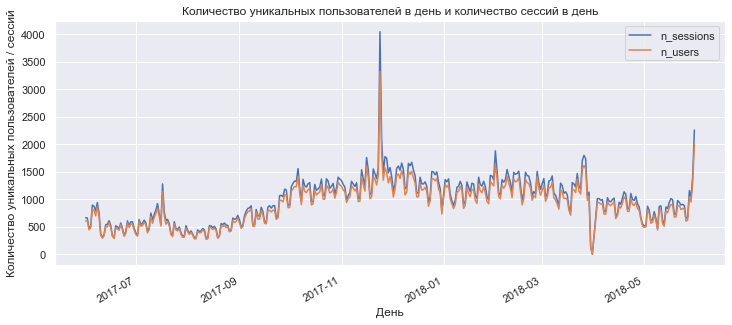

In [339]:
sessions_per_user = visits.groupby(['day']).agg({'uid':['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user_avg = sessions_per_user['n_sessions'].mean()
print('Среднее количество сессий в день: {:.0f}'.format(sessions_per_user_avg))

print_plot(sessions_per_user, 
           'line', 'Количество уникальных пользователей в день и количество сессий в день', 'День', 'Количество уникальных пользователей / сессий')

Из графика можно сделать вывод о том, что пользователи, в основном, заходят не больше одного раза в день. Для наглядности рассчитаем среднее количество сессий на одного пользователя в день и выведем полученные значения в виде графика:

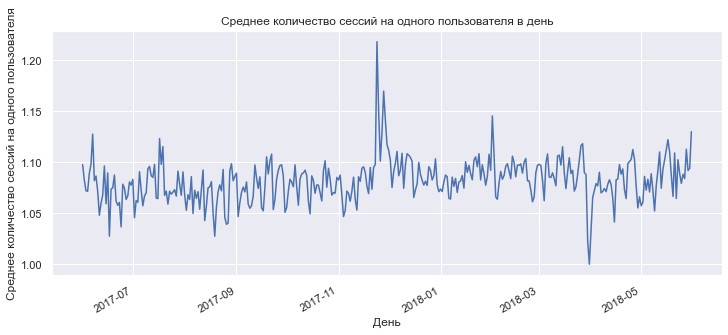

Среднее количество сессий на одного пользователя в день: 1.08


In [340]:
sessions_per_user['avg_count_sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print_plot(sessions_per_user['avg_count_sessions_per_user'],
          'line', 'Среднее количество сессий на одного пользователя в день', 'День',
           'Среднее количество сессий на одного пользователя')
print('Среднее количество сессий на одного пользователя в день: {:.2f}'.format(sessions_per_user['avg_count_sessions_per_user'].mean()))

**Количество сессий в разрезе устройств и рекламных источников**

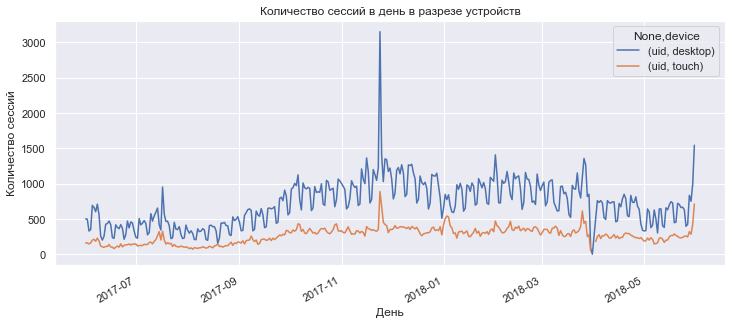

In [341]:
# В разрезе устройств
print_plot(visits.groupby(['day', 'device']).agg({'uid':'count'}).unstack(),
                         'line', 'Количество сессий в день в разрезе устройств', 'День', 'Количество сессий')

По графику видно, что количество сессий для устройств типа desktop значетельно выше, чем для устройств типа touch.

Рассчитаем среднее количество сессий по каждому типу устройства в день, неделю и месяц.

In [342]:
periods = ['day','week','month']
device_types = ['desktop','touch']
sessions_device = pd.DataFrame()
for device_type in device_types:
    for period in periods:
        sessions_device.loc[period,device_type]  = visits[visits['device'] == device_type].groupby(period)[['uid']].count()['uid'].mean()
sessions_device['sum'] =  sessions_device['desktop'] + sessions_device['touch']
sessions_device['desktop_share'] = sessions_device['desktop'] / sessions_device['sum']
display(sessions_device)

,desktop,touch,sum,desktop_share
day,721.337912,266.757576,988.095488,0.730029
week,4954.094340,1827.037736,6781.132075,0.730570
month,21880.583333,8069.416667,29950.000000,0.730570


По всем периодам получается, что доля устройств desktop составляет примерно 73% от общего количества посещений.



Рассчитаем среднее количество сессий в разрезе источников.



In [343]:
sources = visits['source_id'].unique()
sessions_source = ['desctop', 'touch']
sessions_source = pd.DataFrame()
for source in sources:
    for period in periods:
        sessions_source.loc[source, period] = visits[visits['source_id'] == source].groupby(period)[['uid']].count()['uid'].mean()
display(sessions_source)

,day,week,month
4,280.424242,1920.641509,8482.833333
2,131.201102,898.603774,3968.833333
5,184.311295,1262.358491,5575.416667
9,36.575758,250.509434,1106.416667
3,235.840220,1615.283019,7134.166667
1,93.739011,643.792453,2843.416667
10,27.617080,189.150943,835.416667
7,1.058824,1.440000,3.000000
6,1.000000,1.000000,1.000000


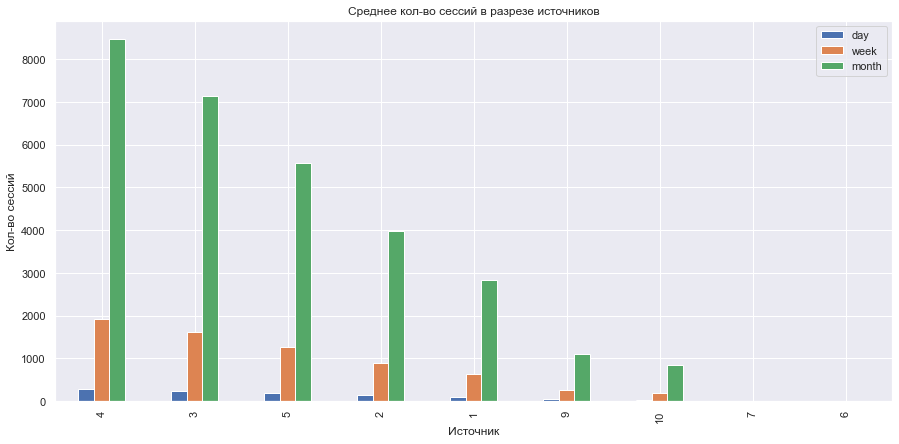

In [344]:
sessions_source.sort_values(by='day', ascending=False).plot(kind='bar', grid=True, figsize=(15,7))
plt.title('Среднее кол-во сессий в разрезе источников')
plt.xlabel('Источник')
plt.ylabel('Кол-во сессий')
plt.show()

<AxesSubplot:title={'center':'Среднее количество сессий в день в разрезе источников: доля каждого источника'}, ylabel='share'>

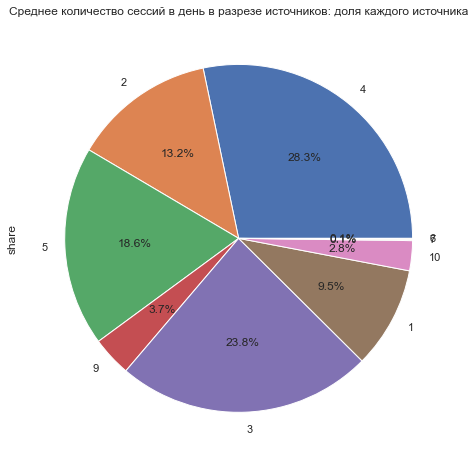

In [345]:
sessions_source['share'] = sessions_source['day'] / sessions_per_user_avg
display(sessions_source['share']
        .plot(kind='pie', title='Среднее количество сессий в день в разрезе источников: доля каждого источника', grid=True, figsize=(8,8), autopct='%1.1f%%'))

**Длительность одной сессии**


Данный параметр мы уже рассчитали ранее на первом шаге. Выведем его гистограмму.

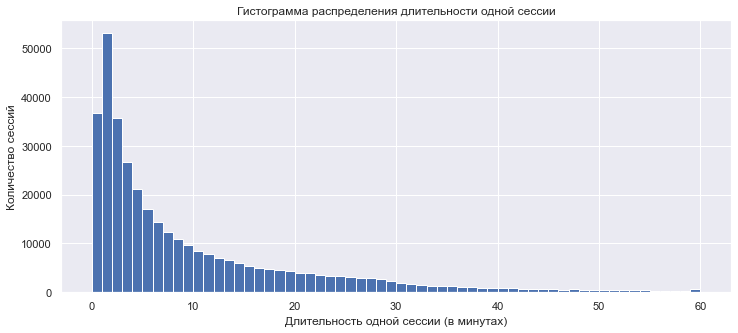

In [346]:
visits['visit_duration'].hist(bins=60, range=(0,60), figsize=(12, 5))
plt.title('Гистограмма распределения длительности одной сессии')
plt.xlabel('Длительность одной сессии (в минутах)')
plt.ylabel('Количество сессий')
plt.show()

In [347]:
visits['visit_duration'].describe()

count    359400.000000
mean         10.724343
std          16.939390
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1408.000000
Name: visit_duration, dtype: float64

Рассчитаем ASL(Average Session Length) - средняя продолжительность сессии. Так как распределение длительности сессии далеко от нормального, будем считать через моду.

In [348]:
asl = visits['visit_duration'].mode()
print('Средняя продолжительность сессии (ASL): ', asl[0])

Средняя продолжительность сессии (ASL):  1


Это значит, что самая частая длина сессии составляет от 1 до 2 минут. Такого времени явно мало для оформления заказа. Скорее всего такой пользователь просматривает главную страницу афиши и выходит из приложения, не найдя подходящего для себя варианта. Также можно сделать вывод о том, что среднестатистический пользователь просто четко знает, что он хочет купить.

**Retention**

Для полноты картины рассчитаем Retention Rate

In [349]:

# Сгруппируем пользоваталей  по дате их первого визита
first_visit = visits.groupby(['uid'])['start_ts'].min()
first_visit.name = 'first_visit_time'

visits = visits.join(first_visit, on='uid')

# добавим столбец с месяцем первого визита
visits['first_time_month'] = visits['first_visit_time'].astype('datetime64[M]')

# рассчитаем lifetime
visits['lifetime'] = visits['month'] - visits['first_time_month']
visits['lifetime'] = visits['lifetime'] / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

# Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:
cohorts = visits.groupby(['first_time_month', 'lifetime']).agg({'uid':'nunique'}).reset_index()
visit_users_count = cohorts[cohorts['lifetime'] == 0][['first_time_month', 'uid']]
visit_users_count = visit_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(visit_users_count, on='first_time_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts['first_time_month'] = cohorts['first_time_month'].dt.strftime('%Y-%m')

# создадим сводник
retention_pivot = cohorts.pivot_table(index='first_time_month', columns='lifetime', values='retention', aggfunc='sum')
retention_pivot


lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_time_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='lifetime', ylabel='first_time_month'>

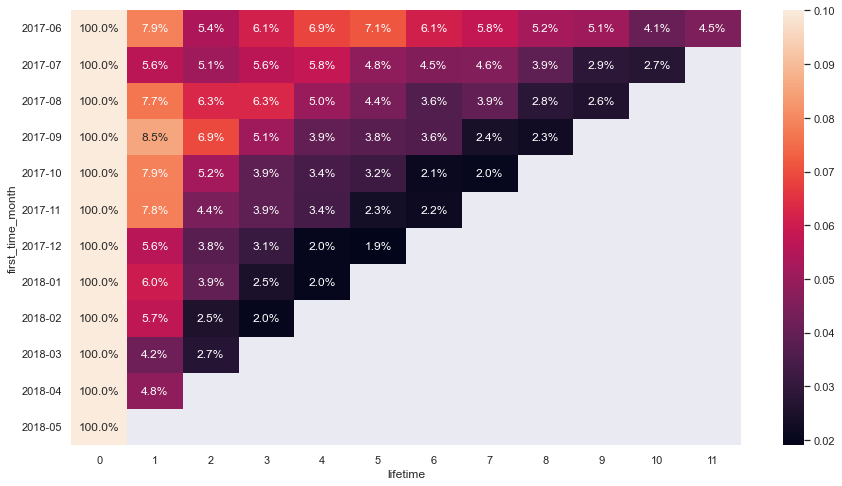

In [350]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(retention_pivot, fmt='.1%', vmax=0.1, annot=True, xticklabels= True, yticklabels= True)

Во второй месяц работы сервиса остается менее 8,5% пользователей, которые возвращаются. Однако в последующие месяцы падение количества пользователей замедляется, и те, кто остался, начинают регулярно использовать сервис.

**Анализ пункта 2.1 "Продукт"**


- Активность пользователей различается в зависимости от дня недели, а также варьируется в зависимости от сезона: весной и летом активность значительно снижается.
- Устройства desktop занимают основную часть всех сессий, а именно - 73%.
- В среднем на одного пользователя приходится одна сессия в день.
- Большинство пользователей приходят из источников 4, 3, 5 и 2, в то время как источники 6 и 7 используются крайне редко.
- Самая распространенная продолжительность сессии - 2 минуты.
- Retention rate невысокий: во второй месяц после начала использования сервиса оставляют его только около 4-8% пользователей, а дальше возвращение не превышает 7%.

**2.2. Продажи**

**Когда люди начинают покупать?**

Посчитаем время для каждого пользователя, которое проходит между первым посещением и первым заказом

count    36509.000000
mean       249.216522
std        429.770861
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: first_order, dtype: float64

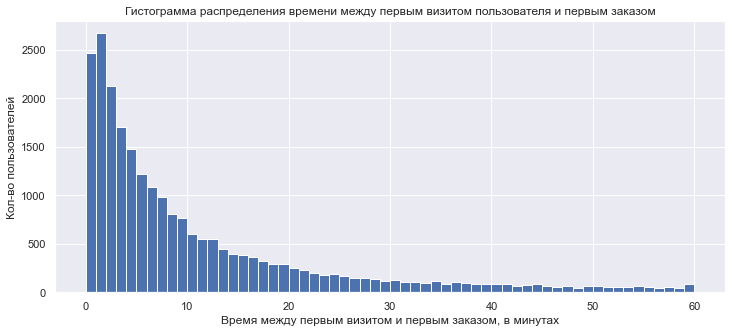

In [351]:
# Дата первого заказа для каждого пользователя
orders_users  = orders.groupby(['uid'])['buy_ts'].min()
orders_users.name = 'first_order_time'
orders_users = orders_users.to_frame()
# Объеденим данные с first_visit
orders_users = orders_users.join(first_visit, on='uid')
orders_users['first_order'] = (orders_users['first_order_time'] - orders_users['first_visit_time']).dt.seconds / 60
display(orders_users['first_order'].describe())

orders_users['first_order'].hist(bins=60, range=(0,60), figsize=(12,5))
plt.grid(True)
plt.title('Гистограмма распределения времени между первым визитом пользователя и первым заказом')
plt.xlabel('Время между первым визитом и первым заказом, в минутах')
plt.ylabel('Кол-во пользователей')
plt.show()

Большинство пользователей совершают заказы в течение первых 20 минут после начала своей первой сессии на сервисе. Многие из них делают покупки уже в первые минуты, что означает, что эти пользователи заранее знают, что им нужно и не тратят время на выбор билетов.

**Количество покупок за периоды день, неделя и месяц**

C:\Users\ehile\AppData\Local\Temp\ipykernel_18704\601068871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['orders_day'] = orders['buy_ts'].astype('datetime64[D]')
C:\Users\ehile\AppData\Local\Temp\ipykernel_18704\601068871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['orders_week'] = orders['buy_ts'].astype('datetime64[W]')
C:\Users\ehile\AppData\Local\Temp\ipykernel_18704\601068871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

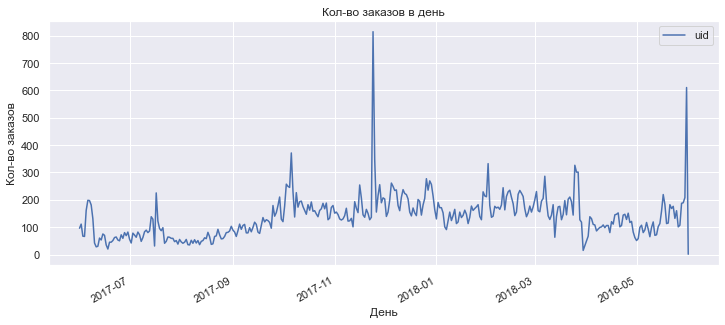

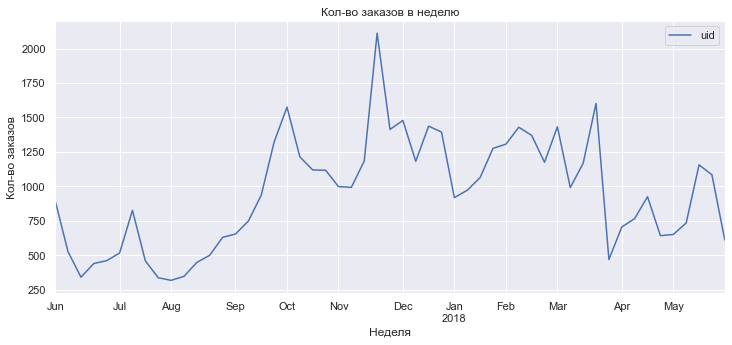

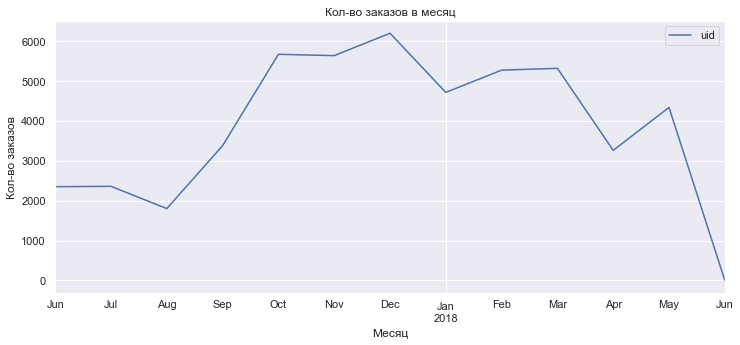

In [352]:
# Добавим колонки по дням, неделям, месяцам в датафрэйм orders
orders['orders_day'] = orders['buy_ts'].astype('datetime64[D]')
orders['orders_week'] = orders['buy_ts'].astype('datetime64[W]')
orders['orders_month'] = orders['buy_ts'].astype('datetime64[M]')

# Построим соответсвующие графики
print_plot(orders.groupby('orders_day')[['uid']].count(),
          'line', 'Кол-во заказов в день', 'День', 'Кол-во заказов')

print_plot(orders.groupby('orders_week')[['uid']].count(),
          'line', 'Кол-во заказов в неделю', 'Неделя', 'Кол-во заказов')

print_plot(orders.groupby('orders_month')[['uid']].count(),
          'line', 'Кол-во заказов в месяц', 'Месяц', 'Кол-во заказов')

По данным графикам можно заметить, что общая картина довольно схожа с той, которую можно увидеть на графиках посещаемости. В частности, здесь также отчетливо видна сезонность покупок, зависимость от дня недели, а также локальные пики продаж и падения в те же периоды времени. 

Рассчитеаем среднее число покупок одного клиента по месяцам, по полугодиям и за год:

In [353]:
# Среднее число покупок по месяцам
orders_per_client = orders.groupby(['orders_month']).agg({'uid':['count','nunique']}).reset_index()
orders_per_client.columns = ['month', 'orders_count', 'users_count']
orders_per_client['avg_orders_per_users'] = orders_per_client['orders_count'] / orders_per_client['users_count']
print('Среднее кол-во покупок на 1 клиента по месяцам: ')
display(orders_per_client)

# Среднее число покупок по полугодиям
print('Среднее кол-во покупок на 1 клиента по полугодиям:')
print('За 1-ое полугодие: {:.2f}'.format(orders[orders['orders_month'] < pd.Timestamp(2017,12,1)].groupby('uid').agg({'uid':'count'}).mean()['uid']))
print('За 2-ое полугодие: {:.2f}'.format(orders[orders['orders_month'] >= pd.Timestamp(2017,12,1)].groupby('uid').agg({'uid':'count'}).mean()['uid']))

# Рассчитаем также среднее число покупок за весь период (за год)
print('Среднее число покупок на одного пользователя за весь рассматриваемый период (за год): {:.2f}'.format(orders.groupby('uid').agg({'uid':'count'}).mean()['uid']))


Среднее кол-во покупок на 1 клиента по месяцам: 


,month,orders_count,users_count,avg_orders_per_users
0,2017-06-01,2353,2022,1.163699
1,2017-07-01,2362,1983,1.191125
2,2017-08-01,1803,1471,1.225697
3,2017-09-01,3383,2748,1.231077
4,2017-10-01,5677,4673,1.214851
5,2017-11-01,5644,4543,1.242351
6,2017-12-01,6206,4937,1.257039
7,2018-01-01,4721,3898,1.211134
8,2018-02-01,5280,4258,1.240019
9,2018-03-01,5325,4181,1.273619


Среднее кол-во покупок на 1 клиента по полугодиям:
За 1-ое полугодие: 1.30
За 2-ое полугодие: 1.34
Среднее число покупок на одного пользователя за весь рассматриваемый период (за год): 1.38


Значение среднего чека не сильно меняется в зависимости от временного промежутка. Клиенты редко совершают больше одной покупки.

**Средний чек**

Средний чек за день:  5.334269881866315
Средний чек за неделю:  5.779353020253249
Средний чек за месяц:  5.869395938156182


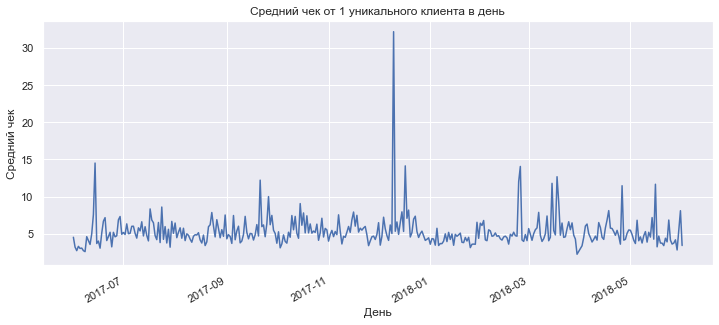

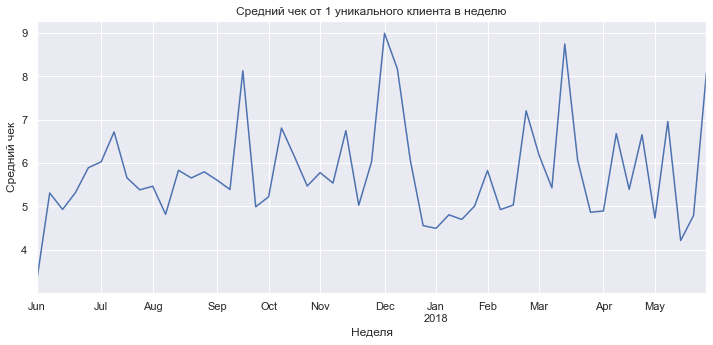

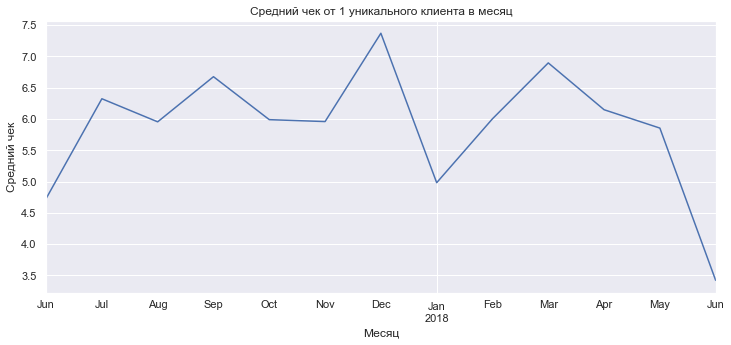

In [354]:
# Рассчитаем среднием чеки по дням, неделям, месяцам и построим графики
avg_revenue_day = orders.groupby('orders_day').agg({'uid':'nunique', 'revenue':'sum'})
avg_revenue_day.columns = ['n_orders', 'total_revenue']
avg_revenue_day['avg_revenue'] = avg_revenue_day['total_revenue'] / avg_revenue_day['n_orders']
print('Средний чек за день: ', avg_revenue_day['avg_revenue'].mean())

avg_revenue_week = orders.groupby('orders_week').agg({'uid':'nunique', 'revenue':'sum'})
avg_revenue_week.columns = ['n_orders', 'total_revenue']
avg_revenue_week['avg_revenue'] = avg_revenue_week['total_revenue'] / avg_revenue_week['n_orders']
print('Средний чек за неделю: ', avg_revenue_week['avg_revenue'].mean())

avg_revenue_month = orders.groupby('orders_month').agg({'uid':'nunique', 'revenue':'sum'})
avg_revenue_month.columns = ['n_orders', 'total_revenue']
avg_revenue_month['avg_revenue'] = avg_revenue_month['total_revenue'] / avg_revenue_month['n_orders']
print('Средний чек за месяц: ', avg_revenue_month['avg_revenue'].mean())

print_plot(avg_revenue_day['avg_revenue'], 'line', 'Средний чек от 1 уникального клиента в день', 'День', 'Средний чек')
print_plot(avg_revenue_week['avg_revenue'], 'line', 'Средний чек от 1 уникального клиента в неделю', 'Неделя', 'Средний чек')
print_plot(avg_revenue_month['avg_revenue'], 'line', 'Средний чек от 1 уникального клиента в месяц', 'Месяц', 'Средний чек')


Анализируя данные по среднему чеку за разные периоды, можно заметить, что его значения отличаются незначительно. Это указывает на то, что клиенты редко делают более одной покупки в месяц.

Однако, интересно то, что значение среднего чека оказалось достаточно стабильным на протяжении всего года. В данном случае не прослеживается явной сезонности, как в случае с посещениями и заказами.

Наблюдается увеличение среднего чека в декабре на всех трех графиках, а также его снижение в январе. Вероятно, это связано с новогодними праздниками, когда люди чаще склонны делать более дорогие покупки.

**LTV**

Для того чтобы оценить эффективность различных когорт клиентов, мы будем учитывать только те когорты, которые существуют не менее 6 месяцев. Такой подход позволит нам получить более точные и репрезентативные данные о показателе LTV (Lifetime Value), который отражает сумму денег, которую клиенты в среднем приносят со всех своих покупок. Использование данных по длительности жизни когорт поможет нам избежать искажений результатов и получить более объективную картину.

In [355]:
# Создадим колонки first_month с месяцем 1ого заказа
orders = orders.join(orders.groupby('uid').agg(first_month=('buy_ts', 'min')).astype('datetime64[M]'), on='uid')

# Создадим когорты
ltv_cohorts = orders.groupby(['first_month', 'orders_month']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
ltv_cohorts['cohort_lifetime'] = ((ltv_cohorts['orders_month'] - ltv_cohorts['first_month']) / np.timedelta64(1, 'M')).round().astype('int')
ltv_cohorts = ltv_cohorts.join(ltv_cohorts.query('cohort_lifetime == 0').groupby('first_month').agg(cohort_size=('uid', 'sum')), on='first_month')

# Рассчитаем LTV, приняв маржинальность = 1, т.е LTV = отношение валовой прибыли за месяц к размеру соответсвующей когорты
ltv_cohorts['ltv'] = ltv_cohorts['revenue'] / ltv_cohorts['cohort_size']

# Построим сводник и рассчитаем LTV
ltv_pivot = ltv_cohorts.pivot_table(index='first_month', columns='cohort_lifetime', values='ltv').cumsum(axis=1)

# Удалим из сводника когорты, время жизни который составляет меньше полугода
ltv_pivot = ltv_pivot[ltv_pivot[6].notna()]



<AxesSubplot:title={'center':'LTV по когортам'}, xlabel='cohort_lifetime', ylabel='first_month'>

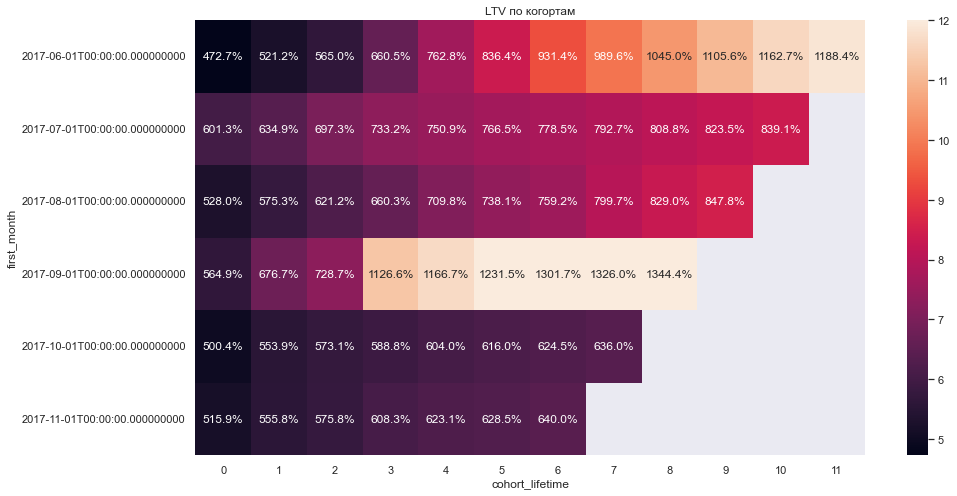

In [356]:
# Построим хитмап
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('LTV по когортам')
# plt.xlabel('Время жизни, месяцы')
# plt.ylabel('Месяц первого заказа')
sns.heatmap(ltv_pivot, fmt='.1%', vmax=12, annot=True, xticklabels= True, yticklabels= True)

Анализ данных показал, что наибольший показатель LTV принадлежит когорте сентября 2017 года. За первые полгода ее клиенты сделали столько же заказов, сколько и клиенты самой старшей когорты (июнь 2017 года) за год, что свидетельствует о высокой активности и эффективности данной группы пользователей. На втором месте по результативности находится когорта июня 2017 года, при этом LTV в течение всего времени жизни у данной когорты стабильно растет, что говорит об отличном потенциале для дальнейшего развития и увеличения прибыли.

Чтобы понять, сколько в среднем приносят клиенты, которых мы условно считаем "постоянными", рассчитаем накопленный LTV за 6 месяцев после 1-ой покупки.

In [357]:
# Рассчитаем накопительный LTV за 6 месцев после первой покупки
m6_cum_ltv = ltv_pivot.mean()[5]
print('Средний LTV за 6 месяцев после первой покупки: {:.1f}'.format(m6_cum_ltv))

Средний LTV за 6 месяцев после первой покупки: 8.0


Чтобы реклама окупилась за 6 месяцев, маркетологи должны тратить на привлечение 1ого покупателя не больше 8 у.е.

Рассчитаем LTV в разрезе источников
Будем считать, что мы 1 раз привлекли пользователя, а для повторных покупок он уже приходит сам

In [358]:
# Находим источник для каждого пользователя 
first_visits_sources = visits.sort_values(by='start_ts').groupby('uid').agg({'source_id':'first'}).reset_index()

orders = orders.merge(first_visits_sources, on ='uid')

# Добавим колонку с временем жизни
orders['lifetime'] = ((orders['buy_ts'] - orders['first_month']) / np.timedelta64(1, 'M')).round().astype(int)

# Создадим сводник для расчета LTV по источникам
ltv_sources = orders.pivot_table(index = 'source_id', columns = 'lifetime', values = 'revenue', aggfunc = 'sum').fillna(0)

# Расчет выручки
ltv_sources = ltv_sources.cumsum(axis=1)

# Расчет размера когорт по каждому источнику 
cohort_sizes = orders.groupby('source_id').agg({'uid':'nunique'}).rename(columns = {'uid':'cohort_size'})
ltv_sources = ltv_sources.merge(cohort_sizes, on = 'source_id')

# Деление выручки на размер когорт
ltv_sources = ltv_sources.div(ltv_sources['cohort_size'], axis=0).drop(columns='cohort_size')




,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,2.809050,6.763280,7.413073,8.321057,8.920031,9.214700,9.457327,9.722735,10.102790,10.353184,10.531450,10.669268,10.735687
2,2.369215,7.369489,8.573109,10.126777,11.408193,12.390528,12.688150,12.934433,13.124308,13.220802,13.274490,13.386874,13.395264
3,1.998841,4.631360,4.808970,4.955697,5.038660,5.104980,5.137143,5.162238,5.185957,5.195910,5.203959,5.206163,5.207914
4,2.111206,4.685277,4.786180,4.896339,5.039225,5.098122,5.312652,5.367824,5.401284,5.444919,5.453214,5.503778,5.506685
5,2.033747,5.008119,5.163399,6.479180,6.931750,7.184728,7.302610,7.413404,7.471511,7.559534,7.579600,7.591033,7.592558
7,0.000000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000,1.220000
9,1.798244,4.034908,4.295193,4.582785,4.735983,4.847371,5.038244,5.110221,5.181397,5.277390,5.285818,5.293566,5.293566
10,1.469766,3.200219,3.248184,3.272012,3.314393,3.324220,3.327905,3.340422,3.350505,3.352298,3.353677,3.353677,3.353677


<AxesSubplot:title={'center':'LTV по источникам'}, ylabel='source_id'>

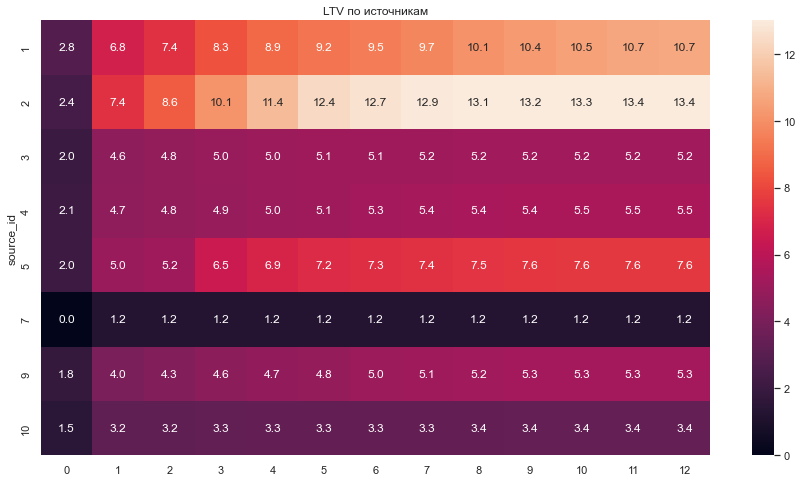

In [369]:
display(ltv_sources)
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('LTV по источникам')
sns.heatmap(ltv_sources, fmt='0.1f', vmax = 13, annot = True, xticklabels = True, yticklabels = True)

Анализ продаж показал, что клиенты, привлеченные из источников 2, 1 и 5, имеют наибольшую LTV. С другой стороны, источник 7 не показал хороших результатов из-за отсутствия заказов, а источник 6 вообще был неактивен.

**Выводы по пункту 2.2 "Продажи"**

- Изучение времени с момента начала сессии показало, что значительная часть пользователей делает свой первый заказ уже в первые минуты использования сервиса. Большинство заказов совершается в течение первых 20 минут после начала сессии. Также наблюдается сезонность продаж, зависимость от дня недели и локальные пики продаж.

- Средний чек равен примерно 5 у.е., при этом его значение остается стабильным на протяжении всего периода, за исключением небольшого увеличения в декабре и снижения в январе. Это можно объяснить новогодними праздниками, когда люди склонны тратить больше денег, и периодом экономии после праздников.

- Когортный анализ показал, что когорта сентября 2017 года имеет наибольшую LTV. За первые полгода клиенты этой когорты совершили столько же заказов, сколько и клиенты самой старшей когорты за год.

- Маркетологам следует учитывать, что для окупаемости рекламных затрат в течение 6 месяцев они не должны тратить на привлечение одного покупателя более 8 у.е.

**2.3. Маркетинг**

**Сколько денег потратили? (всего / на каждый источник / по времени)**



In [370]:
print('Всего потрачено: ', costs['costs'].sum())
print('Суммарная выручка (оборот): ', orders['revenue'].sum())

Всего потрачено:  329131.62
Суммарная выручка (оборот):  252057.2


Затраты на маркетинг не окупились...

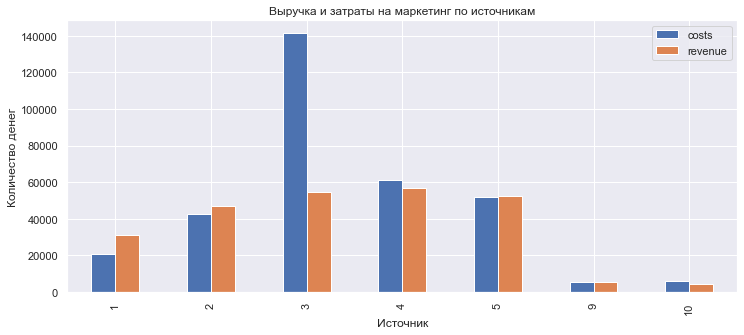

In [377]:
# Расчет трат по каждому источнику
sources_costs = costs.groupby('source_id').sum()
# Расчет вырученных средств по каждому источнику
sources_orders = orders.groupby('source_id')['revenue'].agg(['sum'])
sources_orders.columns = ['revenue']
# Объединение данных по затртатам и выручке
sources_stat = sources_costs.merge(sources_orders, on='source_id')
# Визуализируем с помощью диаграммы
print_plot(sources_stat, 'bar', 'Выручка и затраты на маркетинг по источникам', 'Источник', 'Количество денег' )



Наибольшие затраты на маркетинг были связаны с источником 3, за которым следовали источники 4 и 5. Интересно, что источники 1 и 2, которые приносят наибольшую жизненную ценность клиентов (LTV), оказались только на четвертом и пятом местах по затратам на рекламу. Однако, в случае с источником 3, потраченные средства значительно превысили выручку. В других случаях, выручка примерно равна затратам.

Рассчитаем затртаты в разрезе времени (день / неделя / месяц)

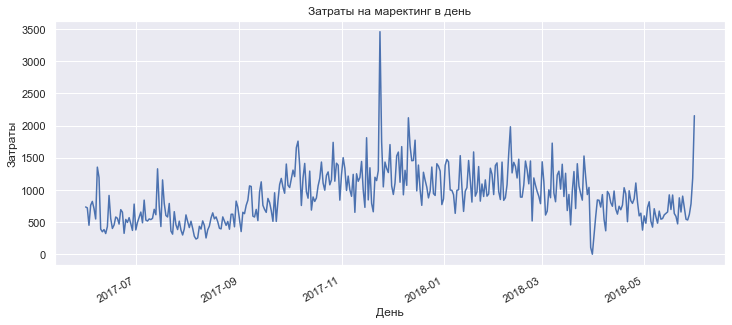

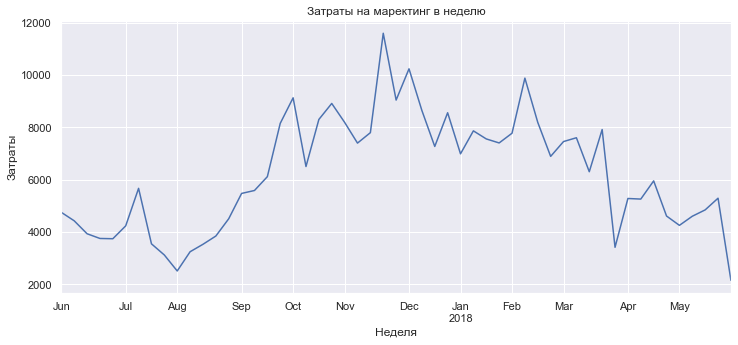

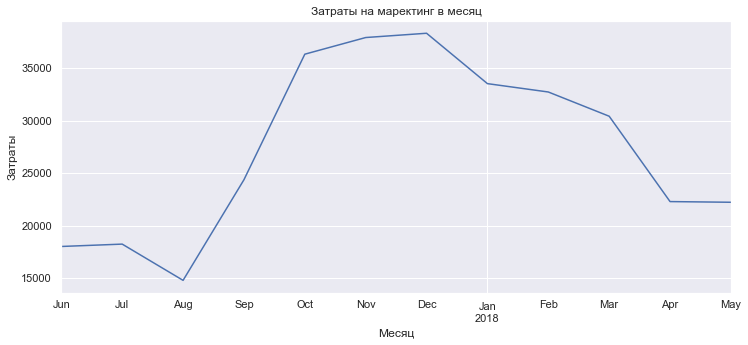

In [378]:
# Добавим колонки с днем, неделей, месяцем
costs['day'] = costs['dt'].astype('datetime64[D]')
costs['week'] = costs['dt'].astype('datetime64[W]')
costs['month'] = costs['dt'].astype('datetime64[M]')

print_plot(costs.groupby('day')['costs'].sum(), 
           'line', 'Затраты на маректинг в день', 'День', 'Затраты')

print_plot(costs.groupby('week')['costs'].sum(), 
           'line', 'Затраты на маректинг в неделю', 'Неделя', 'Затраты')

print_plot(costs.groupby('month')['costs'].sum(), 
           'line', 'Затраты на маректинг в месяц', 'Месяц', 'Затраты')

Для понимания эффективности маркетинга важно учитывать его затраты и связанные с ними результаты. Для проверки связи между этими показателями, можно рассчитать коэффициенты корреляции между объемом затрат на маркетинг и количеством посещений, а также между затратами и числом заказов. 

In [382]:
costs_stat = costs.groupby('day')[['costs']].sum()
visits_stat = visits.groupby('day')[['uid']].nunique()
orders_stat = orders.groupby('orders_day')[['uid']].count()
print('Корреляция затртат на маеркетинг и кол-ва посещений уникальных пользователй (за день): ', costs_stat['costs'].corr(visits_stat['uid']))
print('Корреляция затртат на маеркетинг и кол-ва заказов (за день): ', costs_stat['costs'].corr(orders_stat['uid']))

costs_stat = costs.groupby('week')[['costs']].sum()
visits_stat = visits.groupby('week')[['uid']].nunique()
orders_stat = orders.groupby('orders_week')[['uid']].count()
print('Корреляция затртат на маеркетинг и кол-ва посещений уникальных пользователй (за неделю): ', costs_stat['costs'].corr(visits_stat['uid']))
print('Корреляция затртат на маеркетинг и кол-ва заказов (за неделю): ', costs_stat['costs'].corr(orders_stat['uid']))

costs_stat = costs.groupby('month')[['costs']].sum()
visits_stat = visits.groupby('month')[['uid']].nunique()
orders_stat = orders.groupby('orders_month')[['uid']].count()
print('Корреляция затртат на маеркетинг и кол-ва посещений уникальных пользователй (за месяц): ', costs_stat['costs'].corr(visits_stat['uid']))
print('Корреляция затртат на маеркетинг и кол-ва заказов (за месяц): ', costs_stat['costs'].corr(orders_stat['uid']))

Корреляция затртат на маеркетинг и кол-ва посещений уникальных пользователй (за день):  0.8579980049881306
Корреляция затртат на маеркетинг и кол-ва заказов (за день):  0.7896519794177399
Корреляция затртат на маеркетинг и кол-ва посещений уникальных пользователй (за неделю):  0.9612532396334563
Корреляция затртат на маеркетинг и кол-ва заказов (за неделю):  0.9036289210622706
Корреляция затртат на маеркетинг и кол-ва посещений уникальных пользователй (за месяц):  0.9815898393933337
Корреляция затртат на маеркетинг и кол-ва заказов (за месяц):  0.9559150306520288


При проведении расчета коэффициентов корреляции было обнаружено, что количество новых пользователей и количество сделанных заказов имеют сильную зависимость от затрат на маркетинг даже при сравнении данных по дням.

**Сколько стоило привлечение одного покупателя из каждого источника?**

Рассчитаем **CAC (customer acquisition cost)** — стоимость привлечения клиента - сумма денег, во сколько обходится новый клиент компании.

Среднее значение САС: 9.0


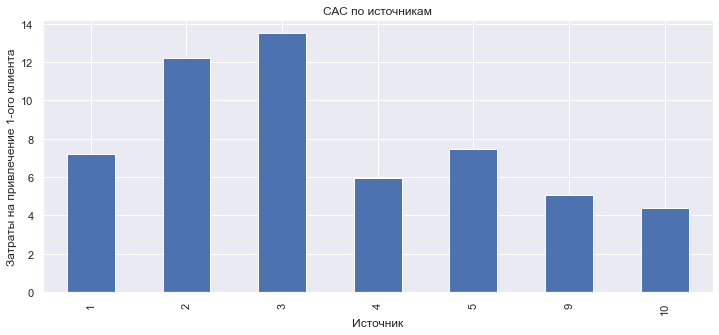

In [385]:
# Подсчет затрат на маркетинг по источникам и объединение
# полученных данных с данными по количеству клиентов, сделавших заказ
cac = costs.groupby('source_id').agg({'costs':'sum'}).reset_index().merge(cohort_sizes.reset_index(), left_on = 'source_id', right_on = 'source_id')
cac = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index().merge(cohort_sizes.reset_index(), left_on = 'source_id', right_on='source_id')
cac['cac'] = cac['costs'] / cac['cohort_size']
cac = cac.set_index('source_id')
print('Среднее значение САС: {:.1f}'.format(cac['costs'].sum() / cac['cohort_size'].sum()))

print_plot(cac['cac'],
          'bar', 'САС по источникам', 'Источник', 'Затраты на привлечение 1-ого клиента')


Наибольшая стоимость привлечения клиента - у источников 3 и 2.



**На сколько окупились расходы? (ROI)**

Зная LTV и CAC можно рассчитать значение ROMI - (Return On Marketing Investment) — показатель возврата инвестиций маркетинговых каналов.

In [389]:
romi = ltv_sources.merge(cac[['cac']], on = 'source_id')
# Расчет ROMI: деление LTV на САС по соответствующим источникам
romi = romi.div(romi['cac'], axis = 0).drop(columns = 'cac')

display(romi)


,0,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,,
1,0.390482,0.940153,1.030480,1.156697,1.239959,1.280921,1.314648,1.351542,1.404373,1.439180,1.463960,1.483118,1.492351
2,0.193883,0.603077,0.701574,0.828717,0.933581,1.013970,1.038325,1.058480,1.074018,1.081914,1.086308,1.095505,1.096191
3,0.148044,0.343022,0.356177,0.367044,0.373189,0.378101,0.380483,0.382342,0.384098,0.384836,0.385432,0.385595,0.385725
4,0.355915,0.789860,0.806871,0.825442,0.849530,0.859459,0.895625,0.904927,0.910567,0.917923,0.919322,0.927846,0.928336
5,0.272347,0.670657,0.691451,0.867653,0.928258,0.962136,0.977922,0.992758,1.000540,1.012327,1.015015,1.016546,1.016750
9,0.354598,0.795648,0.846974,0.903684,0.933894,0.955859,0.993497,1.007690,1.021725,1.040654,1.042316,1.043844,1.043844
10,0.334974,0.729360,0.740292,0.745722,0.755381,0.757621,0.758461,0.761313,0.763611,0.764020,0.764335,0.764335,0.764335


<AxesSubplot:title={'center':'ROMI по источникам'}, ylabel='source_id'>

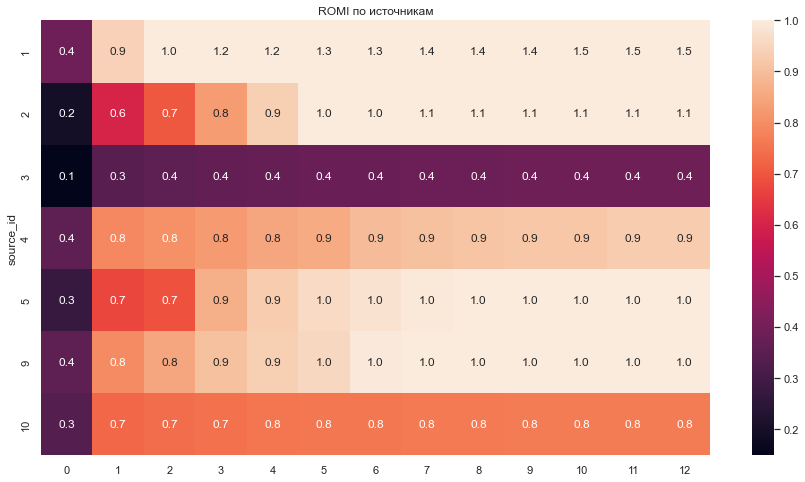

In [392]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('ROMI по источникам')
sns.heatmap(romi, fmt='0.1f', vmax = 1, annot = True, xticklabels = True, yticklabels = True)

Самой быстрой окупаемостью отличилась когорта из первого источника, смогшая выйти на "ноль" всего через 2 месяца после запуска. В свою очередь, когорты номер 2, 9 и 5 потребовали большего времени для окупаемости. К сожалению, когорты из источников 3, 5 и 10 так и не окупились за весь период существования. Особенно печальным результатом себя проявила когорта из третьего источника, которая даже не смогла окупить половину затраченных ресурсов.

<AxesSubplot:title={'center':'ROMI по когортам'}, xlabel='cohort_lifetime', ylabel='first_month'>

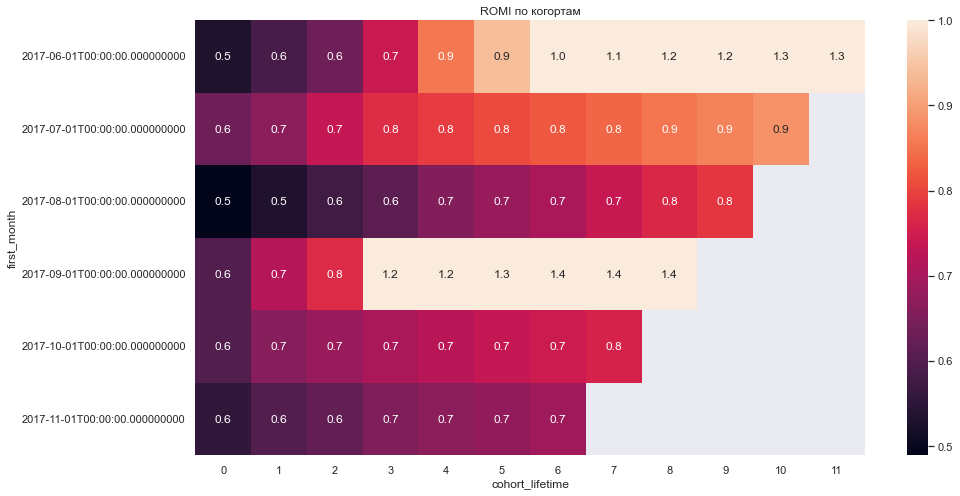

In [397]:
# Месячные расходы
monthly_costs = costs.groupby('month').sum()

# Добавим помесячные расходы в когортный отчет
romi_cohorts = pd.merge(ltv_cohorts, monthly_costs, left_on='first_month', right_on='month')

# CAC
romi_cohorts['cac'] = romi_cohorts['costs'] / romi_cohorts['cohort_size']

# ROMI
romi_cohorts['romi'] = romi_cohorts['ltv'] / romi_cohorts['cac']

# построим сводник
romi_cohorts_pivot = romi_cohorts.pivot_table(index='first_month',
                                             columns = 'cohort_lifetime',
                                             values = 'romi',
                                             aggfunc = 'mean')
# накопительная сумма
romi_cohorts_pivot = romi_cohorts_pivot.cumsum(axis=1)

sns.set(rc = {'figure.figsize':(15,8)})
plt.title('ROMI по когортам')
sns.heatmap(romi_cohorts_pivot[romi_cohorts_pivot[6].notna()], fmt='0.1f', vmax = 1, annot = True, xticklabels = True, yticklabels = True)

- Аналогично расчету LTV, когорта сентября 2017 года также оказалась в числе приоритетных. Изучив данные, стало понятно, что данная когорта достигла точки безубыточности уже через три месяца и произошел резкий рост в самый первый месяц. Возможно это было обусловлено проведением успешной маркетинговой кампании, которая привлекла значительное количество новых клиентов в указанный период.
- Следующее место заняла самая старая когорта (июнь 2017 года), которая окупилась через полгода.
- Но все остальные рассмотренные когорты пока так и не смогли окупиться

Проверим: наступит ли окупаемость сервиса, если наступит, то когда?
Для этого будет учитывать среднюю ROMI по периодам

In [405]:
display(romi_cohorts.pivot_table(
    index='first_month', 
    columns='orders_month', 
    values='romi', 
    aggfunc='mean')
.cumsum(axis=1).mean(axis=0))


orders_month
2017-06-01    0.530530
2017-07-01    0.609326
2017-08-01    0.597294
2017-09-01    0.651594
2017-10-01    0.703549
2017-11-01    0.721548
2017-12-01    0.789592
2018-01-01    0.770004
2018-02-01    0.775282
2018-03-01    0.795030
2018-04-01    0.788017
2018-05-01    0.795609
dtype: float64

К концу гожа ROMI так и недостигла значения 1 => на данный период времени затраты на маректинг еще не окупились, но виден заметный прогресс по месяцам

**Выводы по пункту 2.3. Маркетинг**

- Анализ пункта 2.3 "Маркетинг" показал, что общие затраты на этот раздел значительно превышают выручку - около 330 тыс. у.е при обороте в 250 тыс. у.е. - Больше всего денег было потрачено на источник 3, а после него следовали источники 4 и 5. Однако источники 1 и 2, которые принесли наибольший доход в результате LTV, оказались лишь на четвертом и пятом местах соответственно по расходам на маркетинг. На источник 3 было потрачено гораздо больше, чем он принес дохода. В других случаях выручка более-менее соответствовала затратам.
- Кроме того, затраты на маркетинг сильно коррелируют с посещаемостью сайта и количеством заказов. Сезонность также оказывает влияние на объем затрат. Если затраты на маркетинг почти не меняются от сезона к сезону, то посещаемость и количество заказов имеют явный тренд на спад весной-летом. Это может быть связано с недостаточным финансированием расходов на маркетинг в это время года.
- Средняя стоимость привлечения клиента (CAC) составляет 9 у.е.. Источники 2 и 3 оказались самыми затратными для получения одного клиента.
- Когорта из источника 1 была самой быстро окупаемой - через 2 месяца. Когорты 2, 9 и 5 окупились позже. Однако когорты из источников 3, 4 и 10 не окупились за рассматриваемый период. Когорта из источника 3 оказалась наихудшей - она не окупилась даже наполовину.

**Шаг 3. Общий вывод**

Основываясь на полученных данных, мы можем предложить следующие рекомендации:

- Перспективным источником является источник 1. Клиенты из этого источника имеют высокий LTV и быстро окупаются, основываясь на данных по ROMI. Также можно порекомендовать использовать источники 2, 5 и 9, поскольку выручка от них превышает затраты на маркетинг, а затраты на эти источники окупились за 5-6 месяцев.
- Источник 3 требует значительных вложений, но не окупился даже наполовину. - - - Источники 4 и 10 также не окупились, хотя их ROMI чуть меньше 1. Однако оптимизация затрат на них может привести к большей LTV клиентов из данных источников и полной окупаемости.
- Источники 6 и 7 не были использованы, и их отдача неизвестна. Стоит обратить на них внимание и, возможно, вложить небольшую сумму для проверки потенциала их отдачи в будущем.
- Сезонность, связанная с посещаемостью пользователей и заказами клиентов, может быть связана с изменением затрат на маркетинг в соответствующие периоды. Это основано на данных о корреляции затрат на маркитинг с посещаемостью и заказами.
- При среднем чеке равном 5 и CAC=9 клиенту нужно совершить хотя бы 2 покупки, чтобы окупиться.
- Устройства типа desktop составляют около 73% всех посещений пользователей, но данных о продажах в разрезе устройств нет. Исходя из этого, мы рекомендуем уделить особое внимание веб-версии сервиса, но также следует развивать приложение для мобильных устройств (touch), учитывая их популярность.
- Клиенты совершают мало повторных покупок, что означает, что экстенсивное развитие через привлечение новых клиентов является основным путем развития сервиса.
- Когортный анализ показал, что следует более подробно изучить историю клиентов двух когорт: самой старшей когорты (июня 2017) и когорты сентября 2017 года, которая быстро окупилась за 3 месяца. Необходимо определить факторы, влияющие на стабильный рост LTV клиентов из первой когорты и быструю окупаемость второй когорты.